In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions)) #This line initializes a NumPy array named results with all zeros
  for i,sequences in enumerate(sequences): #This loop iterates over each sequence in the sequences list. The enumerate() function is used to get both the index i and the corresponding sequence.
    results[i, sequences] = 1
  return results

x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

C:\Users\Suvan\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6300 - loss: 0.2207 - val_accuracy: 0.8632 - val_loss: 0.1245
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9037 - loss: 0.0982 - val_accuracy: 0.8888 - val_loss: 0.0891
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9314 - loss: 0.0639 - val_accuracy: 0.8920 - val_loss: 0.0820
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9541 - loss: 0.0464 - val_accuracy: 0.8925 - val_loss: 0.0803
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9663 - loss: 0.0361 - val_accuracy: 0.8909 - val_loss: 0.0816
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9746 - loss: 0.0289 - val_accuracy: 0.8881 - val_loss: 0.0832
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9817 - loss: 0.0229 - val_accuracy: 0.8883 - val_loss: 0.0852
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9872 - loss: 0.0170 - val_accuracy: 0.8837 - v

In [18]:
# Decode the integer sequences into sentences
review_index = int(input("Enter the index of the review"))
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[review_index]])

# Print the first review in the training set
print("Review at index {}:".format(review_index))
print(decoded_review)

# Print the corresponding label
print("Label:", train_label[review_index])
#label  0 is -ve and label 1 is +ve

Enter the index of the review200
Review at index 200:
? this is a bit long 2 hours 20 minutes but it had a a lot of the famous pearl buck novel in it in other words a lot of ground to cover br br it was soap ? at times but had some visually dramatic moments too ? off by a ? attack at the end of the film that was astounding to view considering this film is about 70 years old the special effects crew on this film did a spectacular job br br paul muni and ? rainer were award winning actors in their day and they don't disappoint here both giving powerful performances the only problem is credibility as all the ? are played by ? and some of them like walter connolly just don't look real i'd like to see a re make of this movie with all asian actors not for pc reasons but to simply make the story look and sound more credible
Label: 1


In [12]:
review_check = int(input("Enter the Label of the review: "))


for label in train_label:
    if review_check == 0:
        print("The Review of the movie is Negetive ")
    elif review_check == 1:
        print("The review of the movie is Positive")
    else:
        print("Invalid label")
    break  # Exit the loop after printing the sentiment once

Enter the Label of the review: 0
The Review of the movie is Negetive 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

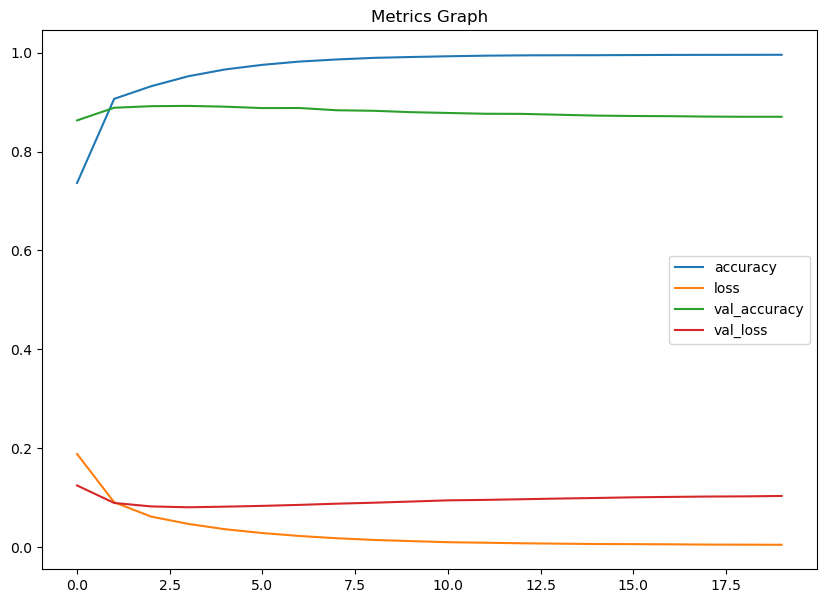

In [20]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()